In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
%matplotlib inline

In [34]:
# Загрузка данных
data = pd.read_csv('C:\\Users\\Пользователь\\Downloads\\SalaryC.csv')

# Первый взгляд на данные
print(f"Размер датасета: {data.shape}")
print("\nПервые 5 строк:")
display(data.head())
print("\nИнформация о датасете:")
display(data.info())
print("\nОписательная статистика:")
display(data.describe(include='all'))
print("\nПропущенные значения:")
display(data.isna().sum())

Размер датасета: (32561, 15)

Первые 5 строк:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None


Описательная статистика:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN



Пропущенные значения:


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [35]:
# Заполнение пропущенных значений (если есть)
# Например, для числовых - медианой, для категориальных - модой
for col in data.columns:
    if data[col].isna().sum() > 0:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].median(), inplace=True)

# Проверка, что пропусков больше нет
print("Пропущенные значения после обработки:")
display(data.isna().sum())

Пропущенные значения после обработки:


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

# Выбираем все нечисловые колонки
cat_cols = data.select_dtypes(include=['object']).columns

# Применяем LabelEncoder
data[cat_cols] = data[cat_cols].apply(LabelEncoder().fit_transform)

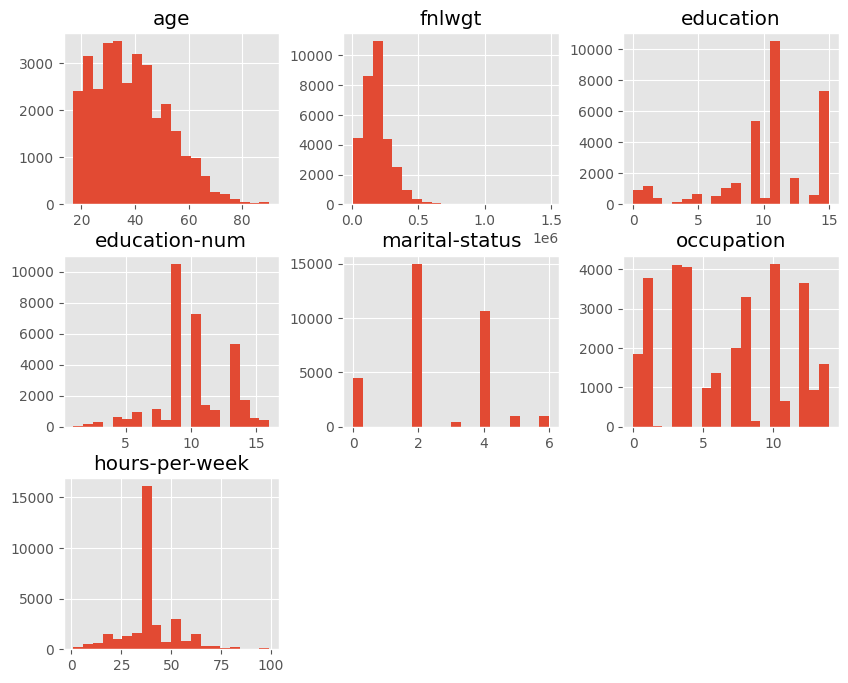

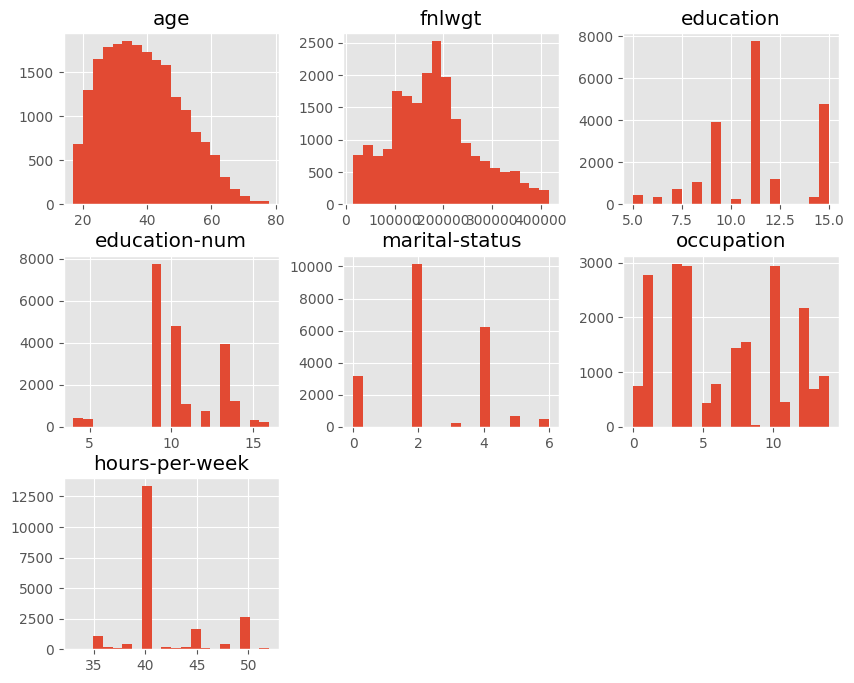

In [37]:
#визуализация признаков
num_features = ['age', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'hours-per-week']
data[num_features].hist(bins=20, figsize=(10,8))
plt.show()

#избавляемся от выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data = remove_outliers(data, num_features)

data[num_features].hist(bins=20, figsize=(10,8))
plt.show()

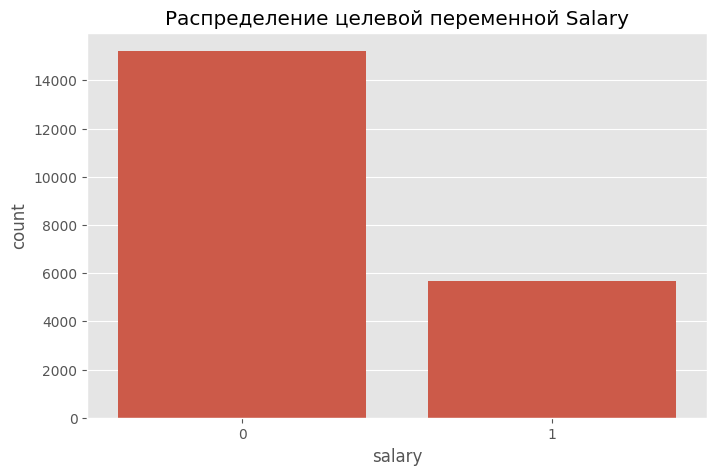

Распределение классов:
salary
0    0.727738
1    0.272262
Name: proportion, dtype: float64


In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Распределение целевой переменной Salary')
plt.show()

print("Распределение классов:")
print(y.value_counts(normalize=True))

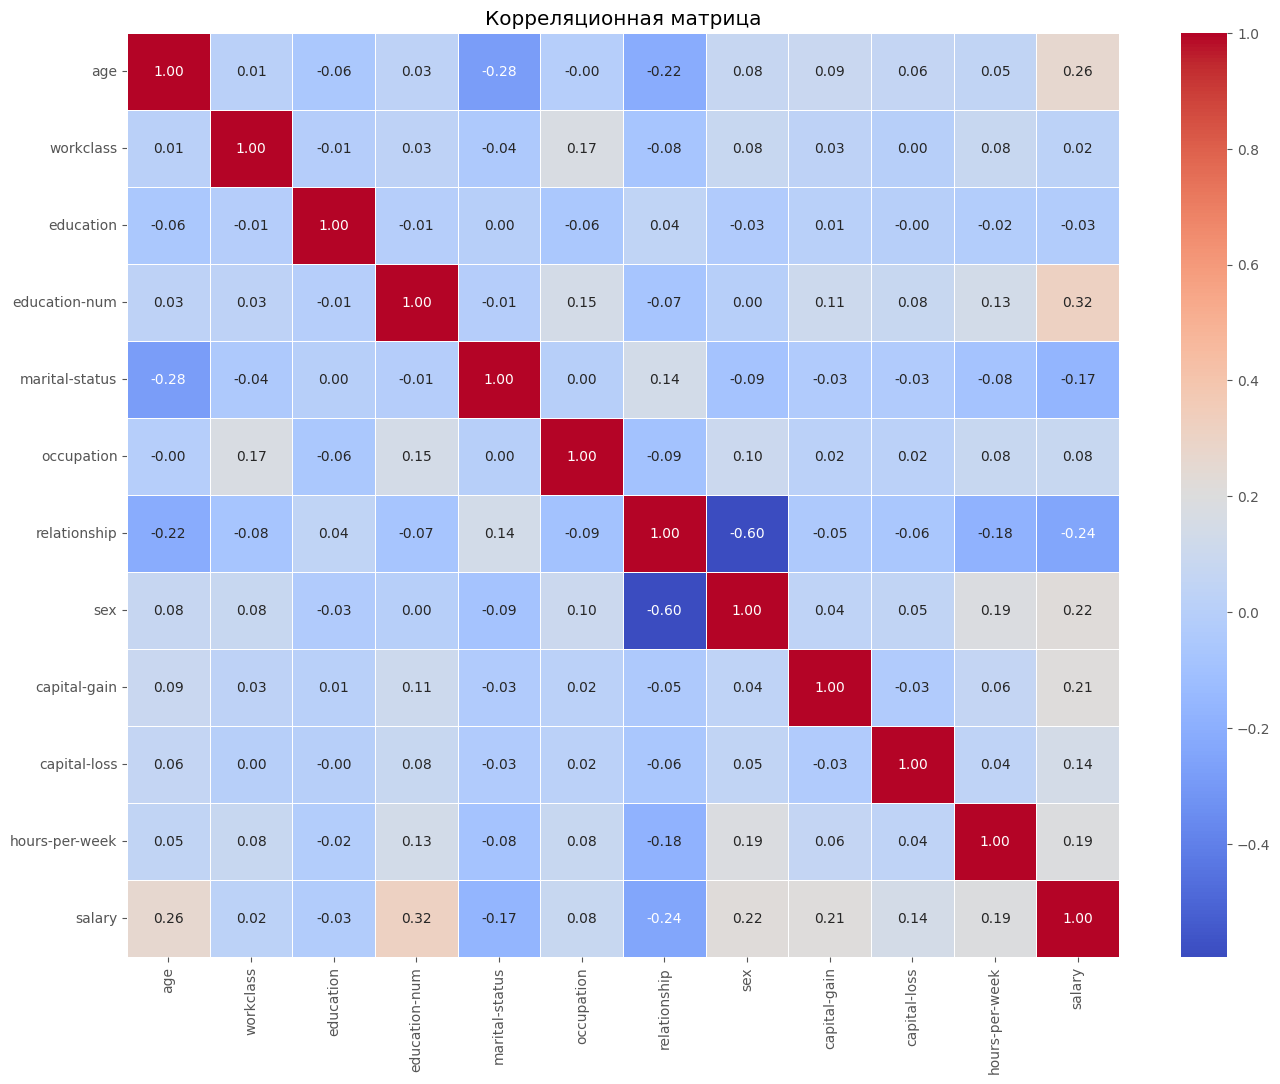

In [40]:
#матрица корреляции
data_corr = data.drop(['fnlwgt', 'race', 'native-country'], axis=1)

# Построение тепловой карты корреляций
plt.figure(figsize=(16, 12))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE

X = data.drop('salary', axis=1)
y = data['salary']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

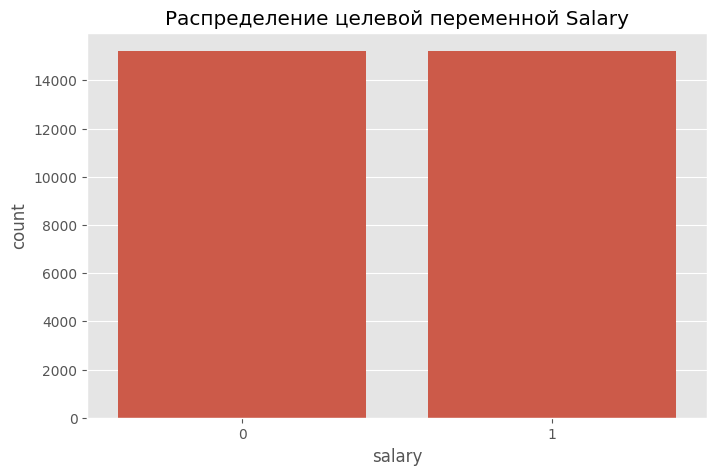

Распределение классов:
salary
0    0.5
1    0.5
Name: proportion, dtype: float64


In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled)
plt.title('Распределение целевой переменной Salary')
plt.show()

print("Распределение классов:")
print(y_resampled.value_counts(normalize=True))

In [43]:
print(f"\nРазмер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер тренировочной выборки: (24347, 13)
Размер тестовой выборки: (6087, 13)


In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [45]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
culminative_variance = explained_variance.cumsum()

n_components = (culminative_variance <= 0.95).sum() + 1
print(f'Число выбранных компонент: {n_components}')

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Число выбранных компонент: 13


In [ ]:
# Получаем матрицу компонент (n_components × n_features)
components = pca.components_

# Если X_scaled был pandas DataFrame, получаем имена фичей
if hasattr(X_scaled, 'columns'):
    feature_names = X_scaled.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X_scaled.shape[1])]

# Создаем DataFrame для наглядности
components_df = pd.DataFrame(components, columns=feature_names, 
                            index=[f'PC{i+1}' for i in range(n_components)])

# Выводим основные компоненты и их вклад от исходных признаков
print("\nВклад исходных признаков в главные компоненты:")
print(components_df)

# Для каждой главной компоненты выводим топ-N наиболее значимых признаков
n_top_features = 13  # сколько топовых признаков показывать для каждой компоненты

print("\nТоповые признаки для каждой главной компоненты:")
for i in range(n_components):
    pc = f'PC{i+1}'
    sorted_features = components_df.loc[pc].abs().sort_values(ascending=False)
    top_features = sorted_features[:n_top_features]
    print(f"{pc} (объясненная дисперсия: {pca.explained_variance_ratio_[i]:.4f}):")
    print(top_features)
    print()

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from scipy.stats import loguniform, randint
import optuna
from optuna.samplers import TPESampler
import joblib

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1: {f1_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}\n")

# 1. Logistic Regression
print("LogisticRegression:")
base_lr = LogisticRegression()
base_lr.fit(X_train, y_train)
evaluate_model(base_lr, X_test, y_test)

# GridSearchCV
params_lr_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), params_lr_grid, cv=5)
grid_lr.fit(X_train, y_train)

# RandomizedSearchCV
params_lr_random = {'C': loguniform(0.01, 100), 'penalty': ['l1', 'l2']}
random_lr = RandomizedSearchCV(LogisticRegression(solver='liblinear'), params_lr_random, n_iter=20, cv=5, random_state=42)
random_lr.fit(X_train, y_train)

# Optuna
def objective_lr(trial):
    C = trial.suggest_float('C', 0.01, 100, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    
    model = LogisticRegression(solver='liblinear', C=C, penalty=penalty)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

study_lr = optuna.create_study(direction='maximize', sampler=TPESampler())
study_lr.optimize(objective_lr, n_trials=20)
best_lr = LogisticRegression(solver='liblinear', **study_lr.best_params)
best_lr.fit(X_train, y_train)

# 2. Random Forest
print("\nRandomForestClassifier:")
base_rf = RandomForestClassifier()
base_rf.fit(X_train, y_train)
evaluate_model(base_rf, X_test, y_test)

# GridSearchCV
params_rf_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), params_rf_grid, cv=5)
grid_rf.fit(X_train, y_train)

# RandomizedSearchCV
params_rf_random = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
random_rf = RandomizedSearchCV(RandomForestClassifier(), params_rf_random, n_iter=20, cv=5, random_state=42)
random_rf.fit(X_train, y_train)

# Optuna
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

study_rf = optuna.create_study(direction='maximize', sampler=TPESampler())
study_rf.optimize(objective_rf, n_trials=20)
best_rf = RandomForestClassifier(**study_rf.best_params)
best_rf.fit(X_train, y_train)

# 3. XGBoost
print("\nXGBClassifier:")
base_xgb = XGBClassifier()
base_xgb.fit(X_train, y_train)
evaluate_model(base_xgb, X_test, y_test)

# GridSearchCV
params_xgb_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]}
grid_xgb = GridSearchCV(XGBClassifier(), params_xgb_grid, cv=5)
grid_xgb.fit(X_train, y_train)

# RandomizedSearchCV
params_xgb_random = {
    'n_estimators': randint(50, 200),
    'learning_rate': loguniform(0.001, 0.1),
    'max_depth': randint(3, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
random_xgb = RandomizedSearchCV(XGBClassifier(), params_xgb_random, n_iter=20, cv=5, random_state=42)
random_xgb.fit(X_train, y_train)

# Optuna
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5)
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

study_xgb = optuna.create_study(direction='maximize', sampler=TPESampler())
study_xgb.optimize(objective_xgb, n_trials=20)
best_xgb = XGBClassifier(**study_xgb.best_params)
best_xgb.fit(X_train, y_train)

# Сравнение всех моделей
models = {
    'Logistic Regression (Grid)': grid_lr.best_estimator_,
    'Logistic Regression (Random)': random_lr.best_estimator_,
    'Logistic Regression (Optuna)': best_lr,
    'Random Forest (Grid)': grid_rf.best_estimator_,
    'Random Forest (Random)': random_rf.best_estimator_,
    'Random Forest (Optuna)': best_rf,
    'XGBoost (Grid)': grid_xgb.best_estimator_,
    'XGBoost (Random)': random_xgb.best_estimator_,
    'XGBoost (Optuna)': best_xgb
}

for name, model in models.items():
    print(f'\n{name}:')
    evaluate_model(model, X_test, y_test)

# Сохранение лучшей модели
best_model = max(models.items(), key=lambda x: f1_score(y_test, x[1].predict(X_test)))
joblib.dump(best_model[1], 'best_model.pkl')

print(f"\nЛучшая модель: {best_model[0]}")

# Загрузка и тестирование модели
loaded_model = joblib.load('best_model.pkl')
sample = X_pca[0:1]
print(f'Предсказание: {loaded_model.predict(sample)}')

LogisticRegression:
Accuracy: 0.7513
F1: 0.7503
Precision: 0.7541



[I 2025-06-17 00:39:43,843] A new study created in memory with name: no-name-2bd51bd3-239d-4fb0-99dc-7fde10a62165
[I 2025-06-17 00:39:44,163] Trial 0 finished with value: 0.7504535708395184 and parameters: {'C': 2.3569823319023047, 'penalty': 'l1'}. Best is trial 0 with value: 0.7504535708395184.
[I 2025-06-17 00:39:44,400] Trial 1 finished with value: 0.7499175189706367 and parameters: {'C': 0.11033218971171875, 'penalty': 'l1'}. Best is trial 0 with value: 0.7504535708395184.
[I 2025-06-17 00:39:44,495] Trial 2 finished with value: 0.7504535708395184 and parameters: {'C': 0.038423410705117886, 'penalty': 'l2'}. Best is trial 0 with value: 0.7504535708395184.
[I 2025-06-17 00:39:44,786] Trial 3 finished with value: 0.7504950495049505 and parameters: {'C': 0.3364787217121533, 'penalty': 'l1'}. Best is trial 3 with value: 0.7504950495049505.
[I 2025-06-17 00:39:44,877] Trial 4 finished with value: 0.7504535708395184 and parameters: {'C': 9.48602147042525, 'penalty': 'l2'}. Best is trial


RandomForestClassifier:
Accuracy: 0.8423
F1: 0.8447
Precision: 0.8331



[I 2025-06-17 01:02:11,409] A new study created in memory with name: no-name-7f7fb658-631c-4f5a-82c1-17e7ad5caa48
[I 2025-06-17 01:02:25,819] Trial 0 finished with value: 0.7483149761630774 and parameters: {'n_estimators': 137, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.7483149761630774.
[I 2025-06-17 01:02:42,830] Trial 1 finished with value: 0.8440249560070389 and parameters: {'n_estimators': 64, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 1 with value: 0.8440249560070389.
[I 2025-06-17 01:03:24,229] Trial 2 finished with value: 0.8466591892324948 and parameters: {'n_estimators': 152, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 2 with value: 0.8466591892324948.
[I 2025-06-17 01:03:30,725] Trial 3 finished with value: 0.735402068735402 and parameters: {'n_estimators': 108, 'max_depth': 4, 'min_samples_spli


XGBClassifier:
Accuracy: 0.8434
F1: 0.8464
Precision: 0.8317



[I 2025-06-17 01:14:29,480] A new study created in memory with name: no-name-183fd34b-ff28-41b9-9acb-09b0c5293455
[I 2025-06-17 01:14:30,073] Trial 0 finished with value: 0.8022959183673469 and parameters: {'n_estimators': 160, 'learning_rate': 0.05206706776621416, 'max_depth': 3, 'subsample': 0.7658782730449063, 'colsample_bytree': 0.8721217687888814, 'gamma': 1.0456375606549013}. Best is trial 0 with value: 0.8022959183673469.
[I 2025-06-17 01:14:31,980] Trial 1 finished with value: 0.8263997497654051 and parameters: {'n_estimators': 81, 'learning_rate': 0.0013529409558598053, 'max_depth': 9, 'subsample': 0.8915501863665136, 'colsample_bytree': 0.8440001450964887, 'gamma': 2.3992170329337945}. Best is trial 1 with value: 0.8263997497654051.
[I 2025-06-17 01:14:35,724] Trial 2 finished with value: 0.8320275775618928 and parameters: {'n_estimators': 126, 'learning_rate': 0.002442359133327657, 'max_depth': 10, 'subsample': 0.7789070453611283, 'colsample_bytree': 0.7351746595827306, 'gam


Logistic Regression (Grid):
Accuracy: 0.7513
F1: 0.7502
Precision: 0.7542


Logistic Regression (Random):
Accuracy: 0.7519
F1: 0.7516
Precision: 0.7534


Logistic Regression (Optuna):
Accuracy: 0.7513
F1: 0.7517
Precision: 0.7512


Random Forest (Grid):
Accuracy: 0.8106
F1: 0.8188
Precision: 0.7856


Random Forest (Random):
Accuracy: 0.8408
F1: 0.8462
Precision: 0.8195


Random Forest (Optuna):
Accuracy: 0.8439
F1: 0.8492
Precision: 0.8225


XGBoost (Grid):
Accuracy: 0.8318
F1: 0.8379
Precision: 0.8092


XGBoost (Random):
Accuracy: 0.8439
F1: 0.8475
Precision: 0.8294


XGBoost (Optuna):
Accuracy: 0.8485
F1: 0.8522
Precision: 0.8328


Лучшая модель: XGBoost (Optuna)
Предсказание: [0]
